In [ ]:
#Need to explore - ViT + ExpW


In [1]:
import os
import zipfile

# Create a Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
!mv kaggle.json /root/.kaggle/

# Set correct permissions
!chmod 600 /root/.kaggle/kaggle.json



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shuvoalok/raf-db-dataset")

print("Path to dataset files:", path)

100%|██████████| 37.7M/37.7M [00:00<00:00, 94.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2


In [3]:
import pandas as pd

train_csv_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/train_labels.csv"
test_csv_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/test_labels.csv"

# Load CSV files
train_labels = pd.read_csv(train_csv_path)
test_labels = pd.read_csv(test_csv_path)

# Show first few rows
print("Train CSV Sample:")
print(train_labels.head())

print("\nTest CSV Sample:")
print(test_labels.head())


Train CSV Sample:
                     image  label
0  train_00001_aligned.jpg      5
1  train_00002_aligned.jpg      5
2  train_00003_aligned.jpg      4
3  train_00004_aligned.jpg      4
4  train_00005_aligned.jpg      5

Test CSV Sample:
                   image  label
0  test_0001_aligned.jpg      5
1  test_0002_aligned.jpg      1
2  test_0003_aligned.jpg      4
3  test_0004_aligned.jpg      1
4  test_0005_aligned.jpg      5


In [4]:
# Print all unique labels from the train and test datasets
print("Unique labels in train dataset:", train_labels["label"].unique())
print("Unique labels in test dataset:", test_labels["label"].unique())


Unique labels in train dataset: [5 4 1 6 2 3 7]
Unique labels in test dataset: [5 1 4 3 6 2 7]


In [5]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/DATASET"

# List a few sample files from the dataset directory
sample_files = os.listdir(dataset_path)[:10]
print("Sample files in dataset directory:", sample_files)


Sample files in dataset directory: ['train', 'test']


In [6]:
import os

train_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/DATASET/train"
test_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/DATASET/test"

# Check inside one of the numbered folders
for label in os.listdir(train_path):
    label_folder = os.path.join(train_path, label)
    if os.path.isdir(label_folder):  # Ensure it's a folder
        print(f"Sample images in {label}:", os.listdir(label_folder)[:10])


Sample images in 5: ['train_02993_aligned.jpg', 'train_07330_aligned.jpg', 'train_04163_aligned.jpg', 'train_05761_aligned.jpg', 'train_05127_aligned.jpg', 'train_05745_aligned.jpg', 'train_06632_aligned.jpg', 'train_01766_aligned.jpg', 'train_07172_aligned.jpg', 'train_05465_aligned.jpg']
Sample images in 1: ['train_01000_aligned.jpg', 'train_08403_aligned.jpg', 'train_08203_aligned.jpg', 'train_05677_aligned.jpg', 'train_02631_aligned.jpg', 'train_01739_aligned.jpg', 'train_06741_aligned.jpg', 'train_08729_aligned.jpg', 'train_00136_aligned.jpg', 'train_03938_aligned.jpg']
Sample images in 6: ['train_08548_aligned.jpg', 'train_04341_aligned.jpg', 'train_04910_aligned.jpg', 'train_00681_aligned.jpg', 'train_02854_aligned.jpg', 'train_00095_aligned.jpg', 'train_04655_aligned.jpg', 'train_03551_aligned.jpg', 'train_01284_aligned.jpg', 'train_06061_aligned.jpg']
Sample images in 3: ['train_00447_aligned.jpg', 'train_04825_aligned.jpg', 'train_05026_aligned.jpg', 'train_09581_aligned.jpg'

In [7]:
import os
import shutil
import pandas as pd

# Define correct paths
dataset_path_train = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/DATASET/train"
dataset_path_test = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/DATASET/test"

train_csv_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/train_labels.csv"
test_csv_path = "/root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2/test_labels.csv"

train_dir = "/root/rafdb/train"
test_dir = "/root/rafdb/test"

# Load CSV labels
train_labels = pd.read_csv(train_csv_path)
test_labels = pd.read_csv(test_csv_path)

# Define label mapping
label_map = {
    1: "Happy",
    2: "Sad",
    3: "Surprise",
    4: "Fear",
    5: "Disgust",
    6: "Anger",
    7: "Contempt"
}

# Create class directories
for label in label_map.values():
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

print("Class folders created successfully.")

# Move train images
for _, row in train_labels.iterrows():
    image_name = row["image"]
    label_id = row["label"]

    if label_id in label_map:
        class_name = label_map[label_id]

        # Images are inside subfolders named as their numeric label
        src = os.path.join(dataset_path_train, str(label_id), image_name)
        dest = os.path.join(train_dir, class_name, image_name)

        if os.path.exists(src):
            shutil.move(src, dest)
        else:
            print(f"Warning: {src} not found!")

# Move test images
for _, row in test_labels.iterrows():
    image_name = row["image"]
    label_id = row["label"]

    if label_id in label_map:
        class_name = label_map[label_id]

        # Images are inside subfolders named as their numeric label
        src = os.path.join(dataset_path_test, str(label_id), image_name)
        dest = os.path.join(test_dir, class_name, image_name)

        if os.path.exists(src):
            shutil.move(src, dest)
        else:
            print(f"Warning: {src} not found!")

print("Dataset successfully organized.")


Class folders created successfully.
Dataset successfully organized.


In [8]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
train_dir = "/root/rafdb/train"
test_dir = "/root/rafdb/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Use batch size 8 to prevent crashes
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Print final class labels
class_names = train_dataset.classes
print(f"Classes used for training: {class_names}")


Classes used for training: ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']


In [9]:
import timm
import torch
import torch.nn as nn
from torch.cuda.amp import autocast, GradScaler

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ConvNeXt Large
model = timm.create_model("convnext_large", pretrained=True, num_classes=len(class_names))
model.to(device)

# Enable mixed precision
scaler = GradScaler()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

print("ConvNeXt model loaded with mixed precision enabled.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/791M [00:00<?, ?B/s]

ConvNeXt model loaded with mixed precision enabled.


<ipython-input-9-81b482fe9985>:14: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/5: 100%|██████████| 1534/1534 [05:08<00:00,  4.98it/s, accuracy=76, loss=0.34]


Epoch 1/5 - Train Acc: 76.02%, Val Acc: 82.95%
Checkpoint saved at /content/checkpoints/best_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 2/5: 100%|██████████| 1534/1534 [05:01<00:00,  5.08it/s, accuracy=87.7, loss=0.179]


Epoch 2/5 - Train Acc: 87.70%, Val Acc: 86.08%
Checkpoint saved at /content/checkpoints/best_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 3/5: 100%|██████████| 1534/1534 [04:59<00:00,  5.12it/s, accuracy=93.5, loss=0.0992]


Epoch 3/5 - Train Acc: 93.53%, Val Acc: 86.90%
Checkpoint saved at /content/checkpoints/best_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 4/5: 100%|██████████| 1534/1534 [04:58<00:00,  5.13it/s, accuracy=95.9, loss=0.0574]


Epoch 4/5 - Train Acc: 95.90%, Val Acc: 84.62%
Checkpoint saved at /content/checkpoints/best_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 5/5: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=97.2, loss=0.0403]


Epoch 5/5 - Train Acc: 97.17%, Val Acc: 85.98%
Checkpoint saved at /content/checkpoints/best_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

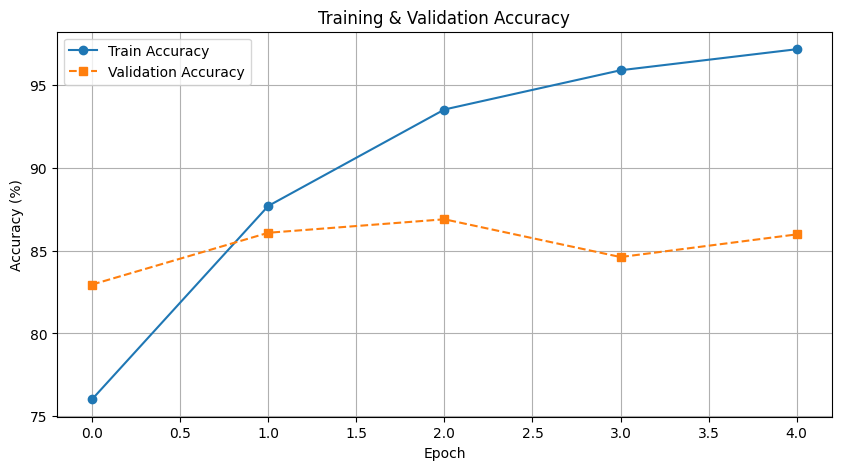

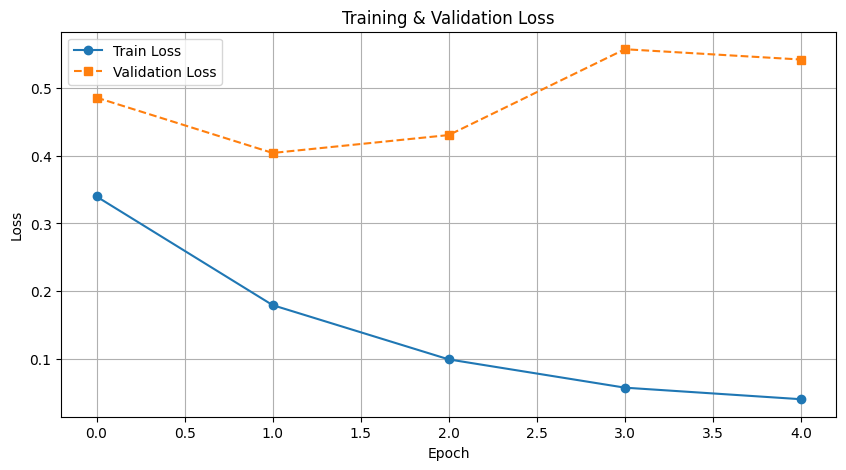

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files  # Import for downloading files

# Define paths for saving checkpoints
checkpoint_dir = "/content/checkpoints/"
os.makedirs(checkpoint_dir, exist_ok=True)


import torch
import torch.optim as optim
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files
import timm

class CustomConvNeXt(nn.Module):
    def __init__(self, num_classes=7):
        super(CustomConvNeXt, self).__init__()
        self.model = timm.create_model("convnext_large", pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.model(x)

# Define paths
checkpoint_dir = "/content/checkpoints/"
checkpoint_path = os.path.join(checkpoint_dir, "best_model.pth")
os.makedirs(checkpoint_dir, exist_ok=True)

# Load model (must define before loading checkpoint)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomConvNeXt(num_classes=7).to(device)  # Make sure this matches the saved model

# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=5e-4)

# Resume training if checkpoint exists
start_epoch = 0
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"], strict=False)  # Ignore missing keys
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    start_epoch = checkpoint["epoch"] + 1
    print(f"Resuming training from epoch {start_epoch}")

# Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2, verbose=True)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10, accumulation_steps=2):
    history = {"train_acc": [], "val_acc": [], "train_loss": [], "val_loss": []}

    for epoch in range(start_epoch, start_epoch + num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        optimizer.zero_grad()
        loop = tqdm(train_loader, leave=True)
        for batch_idx, (images, labels) in enumerate(loop):
            images, labels = images.to(device), labels.to(device)

            # Mixed precision training
            with torch.amp.autocast(device_type="cuda"):
                outputs = model(images)
                loss = criterion(outputs, labels) / accumulation_steps

            loss.backward()

            if (batch_idx + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            loop.set_description(f"Epoch {epoch+1}/{start_epoch + num_epochs}")
            loop.set_postfix(loss=running_loss / (total / 8), accuracy=100.0 * correct / total)

        train_acc = 100.0 * correct / total
        train_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_correct, val_total, val_loss = 0, 0, 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_acc = 100.0 * val_correct / val_total
        val_loss /= len(test_loader)

        print(f"Epoch {epoch+1}/{start_epoch + num_epochs} - Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

        # Save training history
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        # Save best checkpoint
        best_checkpoint_path = os.path.join(checkpoint_dir, "best_model.pth")
        torch.save({
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss": loss
        }, best_checkpoint_path)
        print(f"Checkpoint saved at {best_checkpoint_path}")

        # Save only model weights
        weights_path = os.path.join(checkpoint_dir, "best_model_weights.pth")
        torch.save(model.state_dict(), weights_path)

        # Save as .keras format for TensorFlow compatibility
        keras_save_path = os.path.join(checkpoint_dir, "best_model.keras")
        torch.save(model.state_dict(), keras_save_path)

        # **Automatically download the latest checkpoint**
        try:
            files.download(best_checkpoint_path)  # Download full checkpoint
            files.download(weights_path)  # Download only model weights
            files.download(keras_save_path)  # Download Keras format
        except:
            print("Automatic download failed. You can manually download from /content/checkpoints/")

        # Adjust learning rate based on validation performance
        scheduler.step(val_acc)

    return history

# Train further
history = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=5)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history["train_acc"], label="Train Accuracy", marker='o', linestyle='-')
plt.plot(history["val_acc"], label="Validation Accuracy", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history["train_loss"], label="Train Loss", marker='o', linestyle='-')
plt.plot(history["val_loss"], label="Validation Loss", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-12-8c01c3f120a7>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path, map_location=device))


Loaded model weights from: /content/best_model_weights.pth
Resuming training from epoch 5


Epoch 5/25: 100%|██████████| 1534/1534 [04:55<00:00,  5.19it/s, accuracy=97.6, loss=0.0349]


Epoch 5/25 - Train Acc: 97.63%, Val Acc: 85.46%
💾 Saved model weights: /content/best_model_weights.pth
💾 Saved Keras format model: /content/new_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 6/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.10it/s, accuracy=98.2, loss=0.0282]


Epoch 6/25 - Train Acc: 98.18%, Val Acc: 84.75%


Epoch 7/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.10it/s, accuracy=98.2, loss=0.0269]


Epoch 7/25 - Train Acc: 98.21%, Val Acc: 84.09%


Epoch 8/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.11it/s, accuracy=98.4, loss=0.0218]


Epoch 8/25 - Train Acc: 98.44%, Val Acc: 85.95%


Epoch 9/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.11it/s, accuracy=98.7, loss=0.0191]


Epoch 9/25 - Train Acc: 98.69%, Val Acc: 87.06%


Epoch 10/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.11it/s, accuracy=98.9, loss=0.0174]


Epoch 10/25 - Train Acc: 98.92%, Val Acc: 86.15%
💾 Saved model weights: /content/best_model_weights.pth
💾 Saved Keras format model: /content/new_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 11/25: 100%|██████████| 1534/1534 [05:01<00:00,  5.09it/s, accuracy=98.7, loss=0.0195]


Epoch 11/25 - Train Acc: 98.67%, Val Acc: 86.05%


Epoch 12/25: 100%|██████████| 1534/1534 [04:59<00:00,  5.12it/s, accuracy=99, loss=0.0159]


Epoch 12/25 - Train Acc: 99.04%, Val Acc: 84.49%


Epoch 13/25: 100%|██████████| 1534/1534 [04:59<00:00,  5.12it/s, accuracy=99.7, loss=0.0046]


Epoch 13/25 - Train Acc: 99.71%, Val Acc: 87.78%


Epoch 14/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=99.9, loss=0.0021]


Epoch 14/25 - Train Acc: 99.90%, Val Acc: 86.64%


Epoch 15/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=99.8, loss=0.00381]


Epoch 15/25 - Train Acc: 99.76%, Val Acc: 86.60%
💾 Saved model weights: /content/best_model_weights.pth
💾 Saved Keras format model: /content/new_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 16/25: 100%|██████████| 1534/1534 [04:59<00:00,  5.12it/s, accuracy=99.6, loss=0.00486]


Epoch 16/25 - Train Acc: 99.64%, Val Acc: 86.38%


Epoch 17/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=100, loss=0.000524]


Epoch 17/25 - Train Acc: 99.97%, Val Acc: 86.93%


Epoch 18/25: 100%|██████████| 1534/1534 [04:59<00:00,  5.13it/s, accuracy=99.9, loss=0.00109]


Epoch 18/25 - Train Acc: 99.90%, Val Acc: 86.31%


Epoch 19/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=100, loss=0.000584]


Epoch 19/25 - Train Acc: 99.96%, Val Acc: 87.26%


Epoch 20/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.14it/s, accuracy=100, loss=0.000131]


Epoch 20/25 - Train Acc: 100.00%, Val Acc: 87.65%
💾 Saved model weights: /content/best_model_weights.pth
💾 Saved Keras format model: /content/new_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 21/25: 100%|██████████| 1534/1534 [04:58<00:00,  5.13it/s, accuracy=100, loss=7.15e-5]


Epoch 21/25 - Train Acc: 100.00%, Val Acc: 87.78%


Epoch 22/25: 100%|██████████| 1534/1534 [05:00<00:00,  5.11it/s, accuracy=100, loss=3.48e-5]


Epoch 22/25 - Train Acc: 100.00%, Val Acc: 87.71%


Epoch 23/25: 100%|██████████| 1534/1534 [04:57<00:00,  5.15it/s, accuracy=100, loss=3.75e-5]


Epoch 23/25 - Train Acc: 100.00%, Val Acc: 87.84%


Epoch 24/25: 100%|██████████| 1534/1534 [04:57<00:00,  5.15it/s, accuracy=100, loss=2.67e-5]


Epoch 24/25 - Train Acc: 100.00%, Val Acc: 87.58%


Epoch 25/25: 100%|██████████| 1534/1534 [04:57<00:00,  5.15it/s, accuracy=100, loss=4.18e-5]


Epoch 25/25 - Train Acc: 100.00%, Val Acc: 88.33%
💾 Saved model weights: /content/best_model_weights.pth
💾 Saved Keras format model: /content/new_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

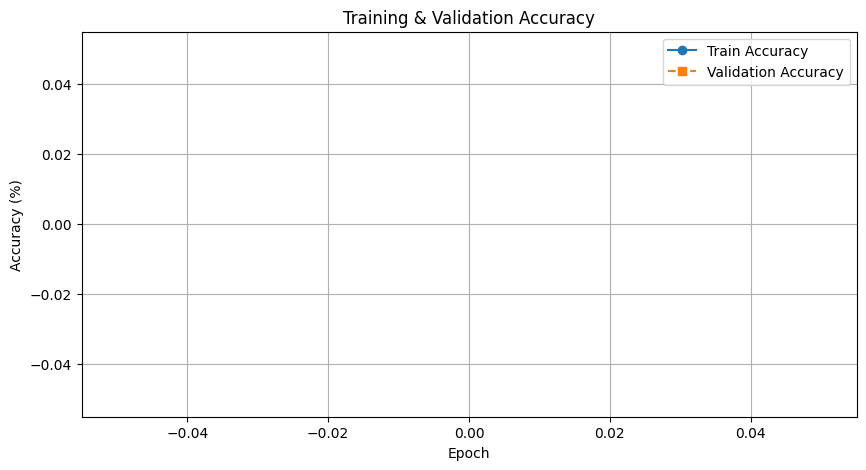

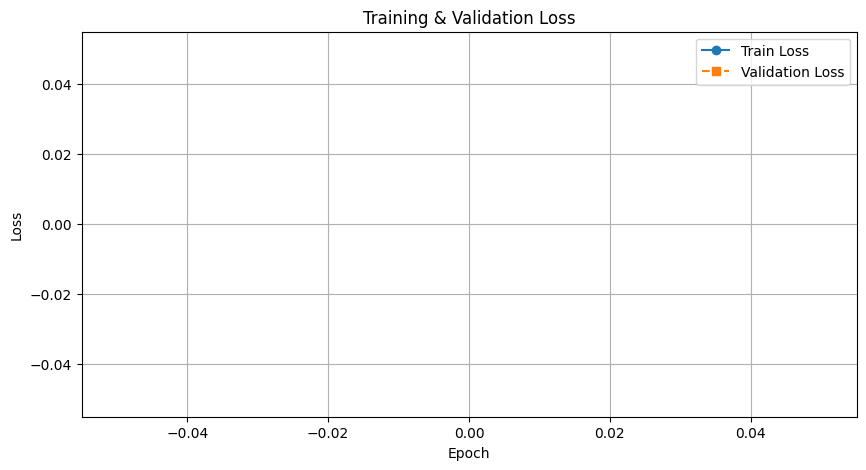

In [12]:
import torch
import torch.optim as optim
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files
import timm

# Define paths for saving and loading weights
checkpoint_dir = "/content/"  # Ensure this matches the actual path
weights_path = os.path.join(checkpoint_dir, "best_model_weights.pth")  # Load existing model
epoch_metadata_path = os.path.join(checkpoint_dir, "last_epoch.txt")  # Store last saved epoch
keras_path = os.path.join(checkpoint_dir, "new_model.keras")  # Save Keras version
os.makedirs(checkpoint_dir, exist_ok=True)

# Define model
class CustomConvNeXt(nn.Module):
    def __init__(self, num_classes=7):
        super(CustomConvNeXt, self).__init__()
        self.model = timm.create_model("convnext_large", pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.model(x)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomConvNeXt(num_classes=7).to(device)

# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=5e-4)

# Resume training from epoch 5 if possible
start_epoch = 5  # Ensure it starts at epoch 5
if os.path.exists(weights_path):
    model.load_state_dict(torch.load(weights_path, map_location=device))
    print(f"Loaded model weights from: {weights_path}")

    # Read last saved epoch if available
    if os.path.exists(epoch_metadata_path):
        with open(epoch_metadata_path, "r") as f:
            last_epoch = int(f.read().strip())
            start_epoch = max(last_epoch + 1, 5)  # Ensure it doesn't go below 5
    print(f"Resuming training from epoch {start_epoch}")

# Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2, verbose=True)

# Training function with metadata saving
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=20, accumulation_steps=2):
    history = {"train_acc": [], "val_acc": [], "train_loss": [], "val_loss": []}

    for epoch in range(start_epoch, 26):  # Ensure training stops at epoch 25
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        optimizer.zero_grad()
        loop = tqdm(train_loader, leave=True)
        for batch_idx, (images, labels) in enumerate(loop):
            images, labels = images.to(device), labels.to(device)

            with torch.amp.autocast(device_type="cuda"):
                outputs = model(images)
                loss = criterion(outputs, labels) / accumulation_steps

            loss.backward()

            if (batch_idx + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            loop.set_description(f"Epoch {epoch}/{25}")
            loop.set_postfix(loss=running_loss / (total / 8), accuracy=100.0 * correct / total)

        train_acc = 100.0 * correct / total
        train_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_correct, val_total, val_loss = 0, 0, 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_acc = 100.0 * val_correct / val_total
        val_loss /= len(test_loader)

        print(f"Epoch {epoch}/25 - Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

        # Save model weights and epoch metadata every 5 epochs
        if epoch % 5 == 0:
            torch.save(model.state_dict(), weights_path)
            print(f"💾 Saved model weights: {weights_path}")

            torch.save(model.state_dict(), keras_path)  # Saving in keras-compatible format
            print(f"💾 Saved Keras format model: {keras_path}")

            with open(epoch_metadata_path, "w") as f:
                f.write(str(epoch))  # Save last epoch for resuming training

            # **Automatically download the weights & keras file**
            try:
                files.download(weights_path)  # Download model weights
                files.download(keras_path)  # Download Keras format
            except:
                print("⚠️ Automatic download failed. You can manually download from /content/")

        # Adjust learning rate based on validation performance
        scheduler.step(val_acc)

    return history

# Continue training from epoch 5 to 25
history = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=20)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history["train_acc"], label="Train Accuracy", marker='o', linestyle='-')
plt.plot(history["val_acc"], label="Validation Accuracy", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history["train_loss"], label="Train Loss", marker='o', linestyle='-')
plt.plot(history["val_loss"], label="Validation Loss", marker='s', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()
